In [67]:
import pandas as pd  # read and wrangle dataframes
import matplotlib.pyplot as plt # visualization
import seaborn as sns # statistical visualizations and aesthetics
from sklearn.base import TransformerMixin # To create new classes for transformations
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) # preprocessing 
from sklearn.decomposition import PCA # dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox # data transform
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve) # model selection modules
from sklearn.pipeline import Pipeline # streaming pipelines
from sklearn.base import BaseEstimator, TransformerMixin # To create a box-cox transformation class
from collections import Counter
import warnings
# load models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import (XGBClassifier, plot_importance)
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from time import time
import numpy as np

%matplotlib inline 
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [53]:
heart = pd.read_csv('heart1.csv')
features = heart.columns[:-1].tolist()
print(heart.shape)

(297, 14)


In [54]:
heart.head()

,Age,Sex,ChestPainType,Restbloodp,Cholesterol,Fastingbs,Restecg,Maxhrate,Exang,Oldpeak,Slope,NoMajorvessels,Thal,Condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [55]:
heart.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
Restbloodp          int64
Cholesterol         int64
Fastingbs           int64
Restecg             int64
Maxhrate            int64
Exang               int64
Oldpeak           float64
Slope               int64
NoMajorvessels      int64
Thal                int64
Condition           int64
dtype: object

In [56]:
heart['Condition'].value_counts()

0    160
1    137
Name: Condition, dtype: int64

In [57]:
heart.describe()

,Age,Sex,ChestPainType,Restbloodp,Cholesterol,Fastingbs,Restecg,Maxhrate,Exang,Oldpeak,Slope,NoMajorvessels,Thal,Condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


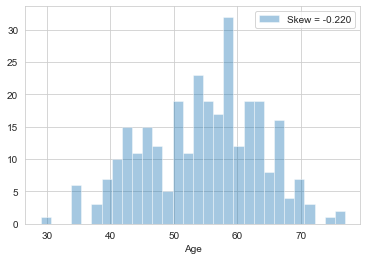

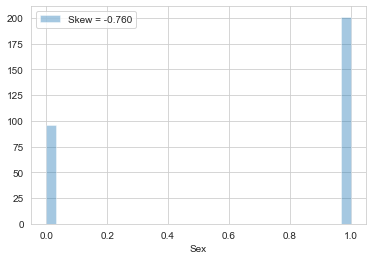

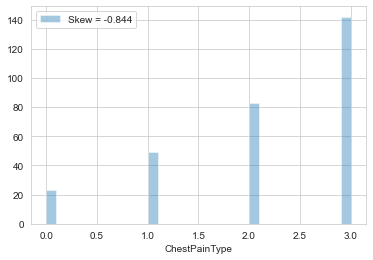

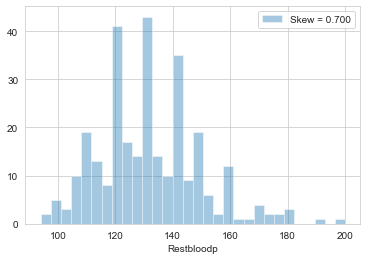

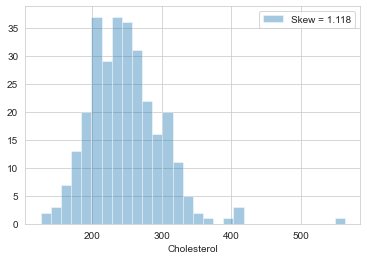

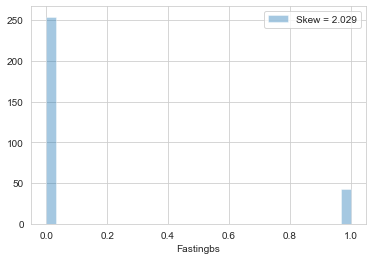

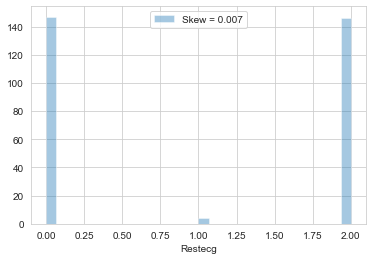

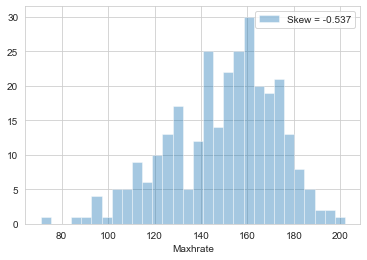

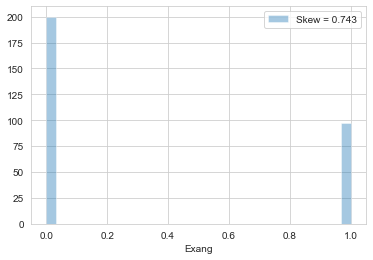

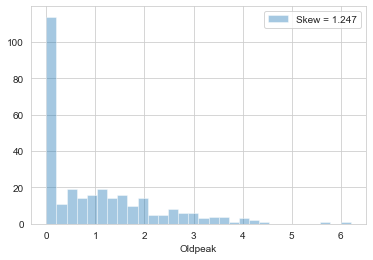

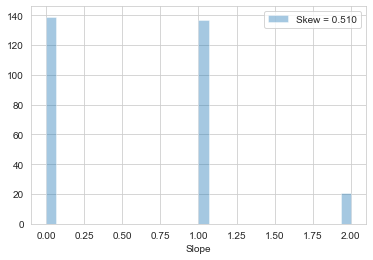

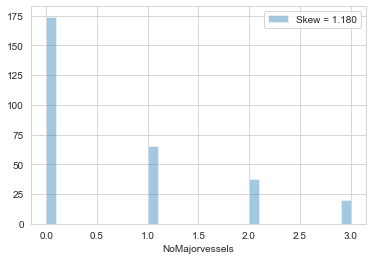

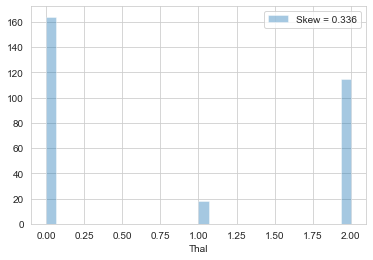

In [58]:
for feat in features:
    skew = heart[feat].skew()
    sns.distplot(heart[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

<Figure size 576x576 with 0 Axes>

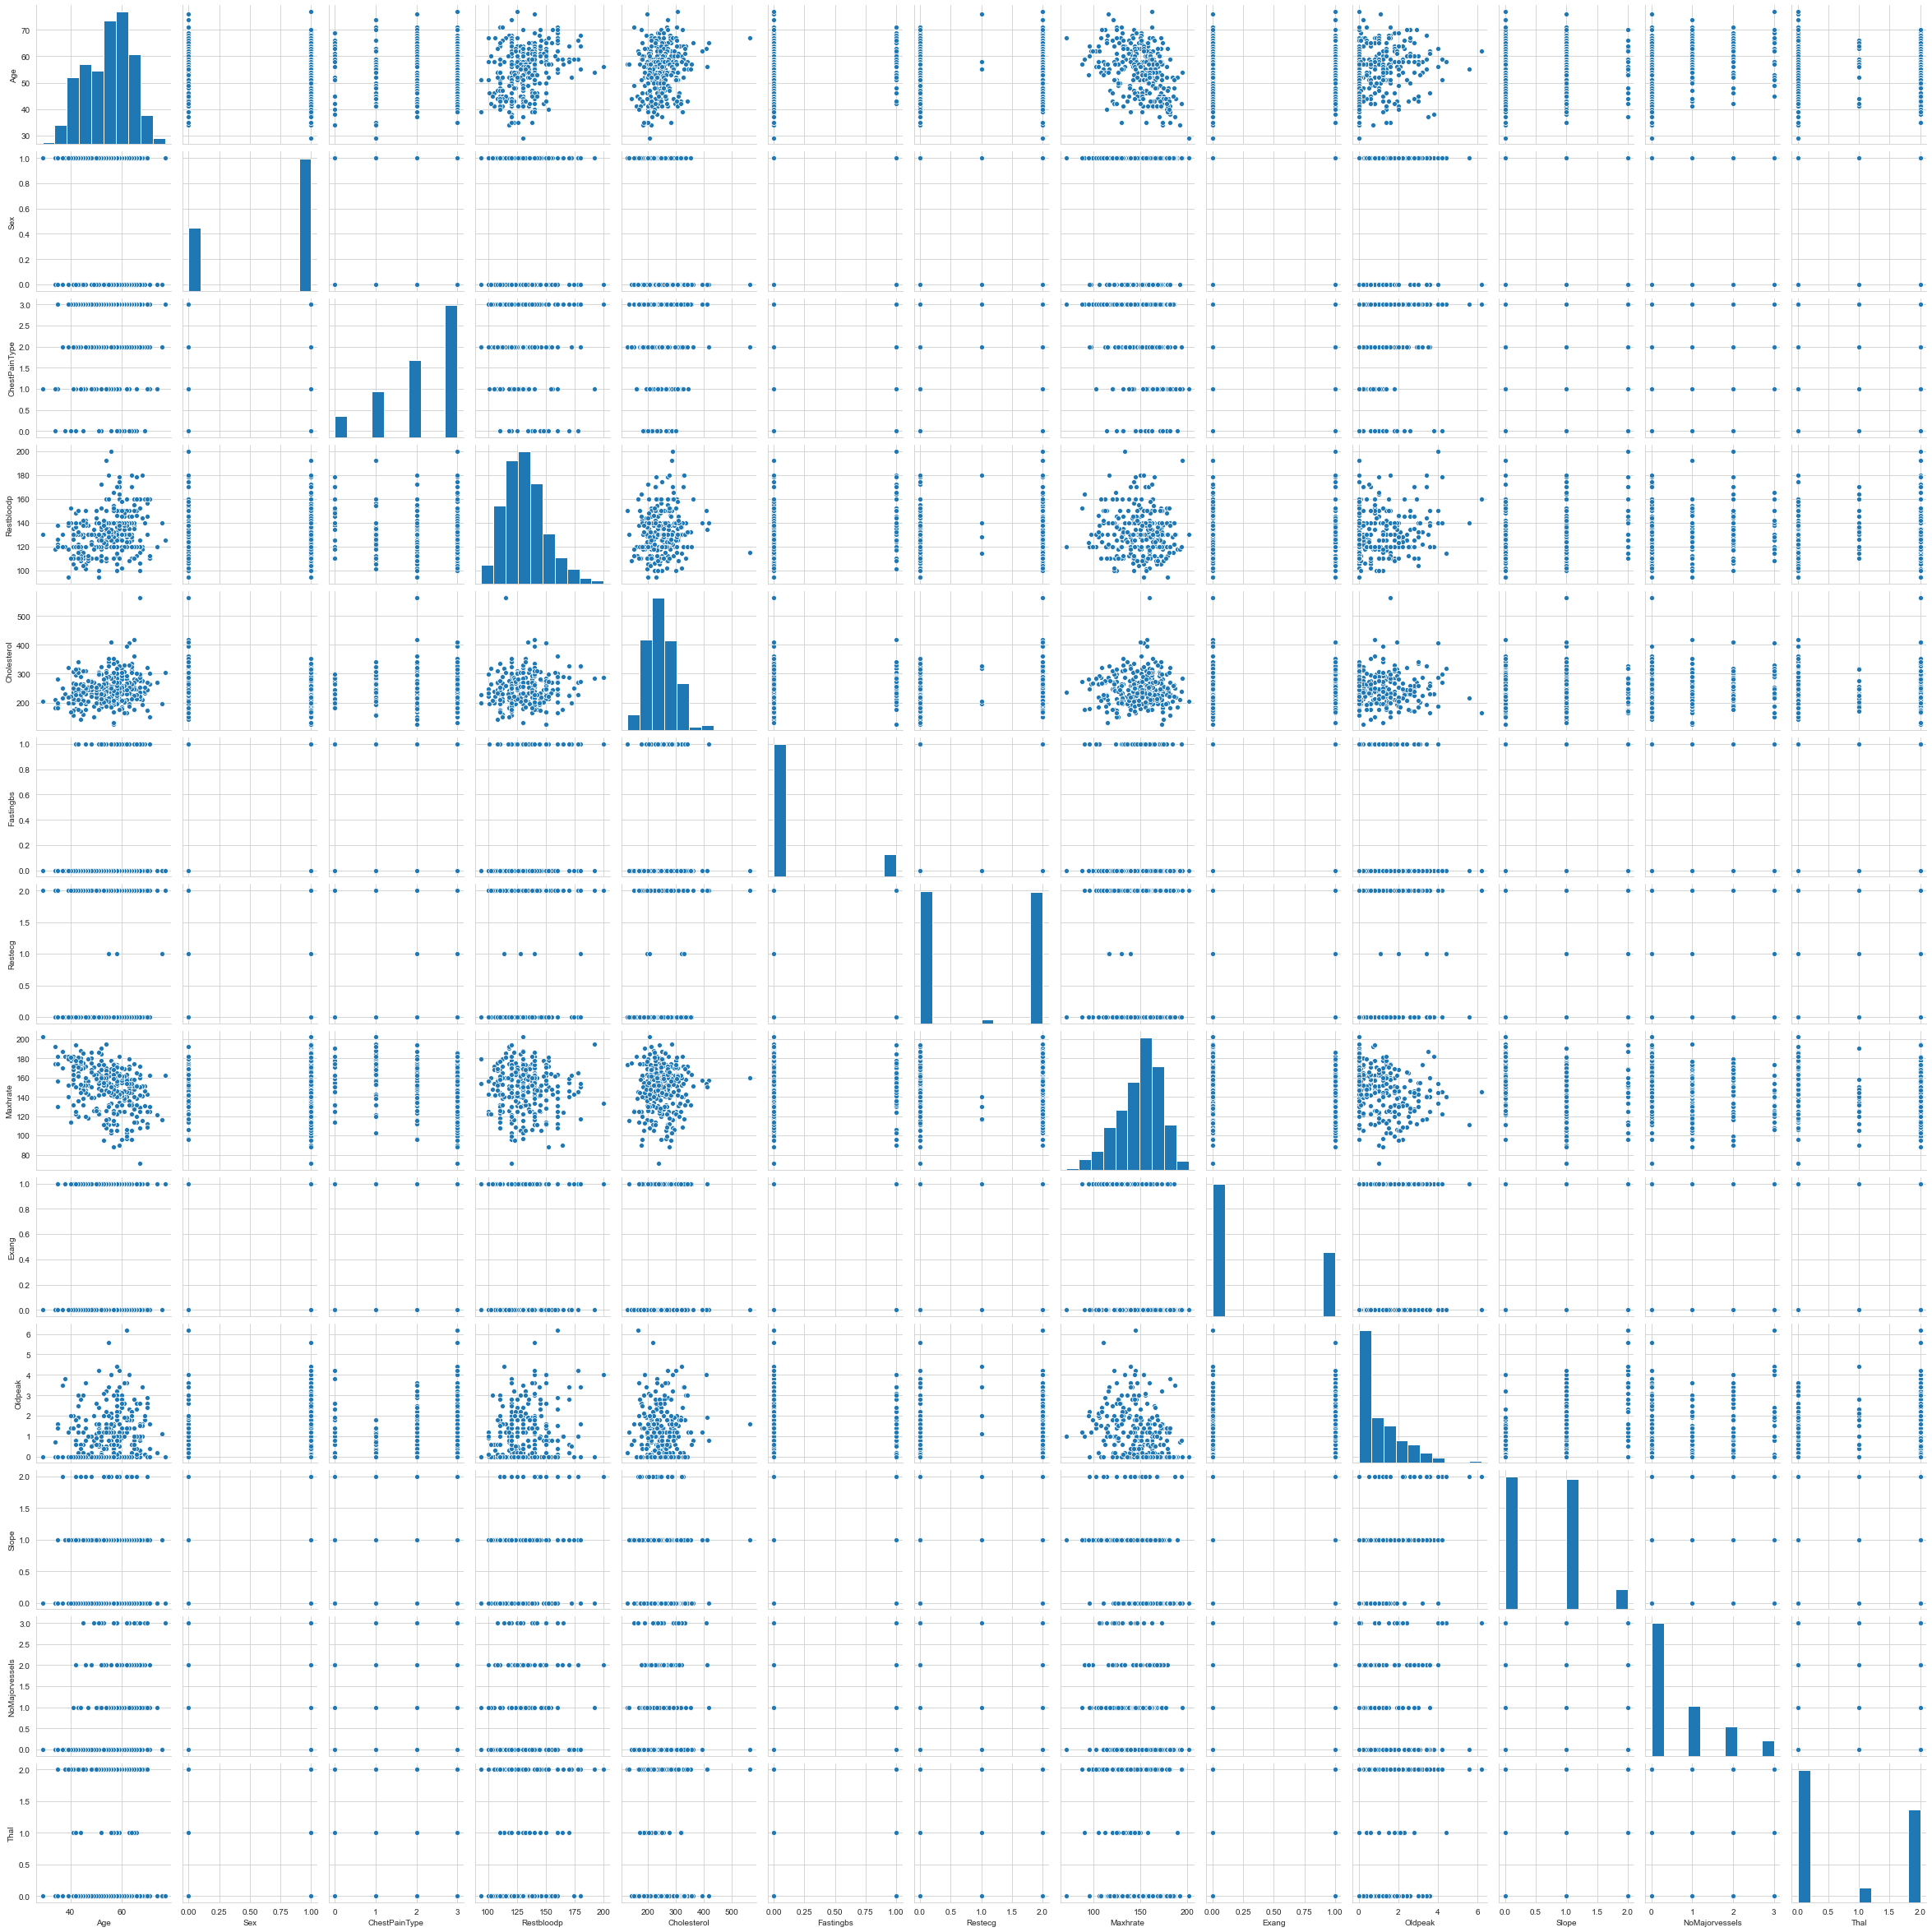

In [59]:
plt.figure(figsize=(8,8))
sns.pairplot(heart[features],palette='coolwarm')
plt.show()

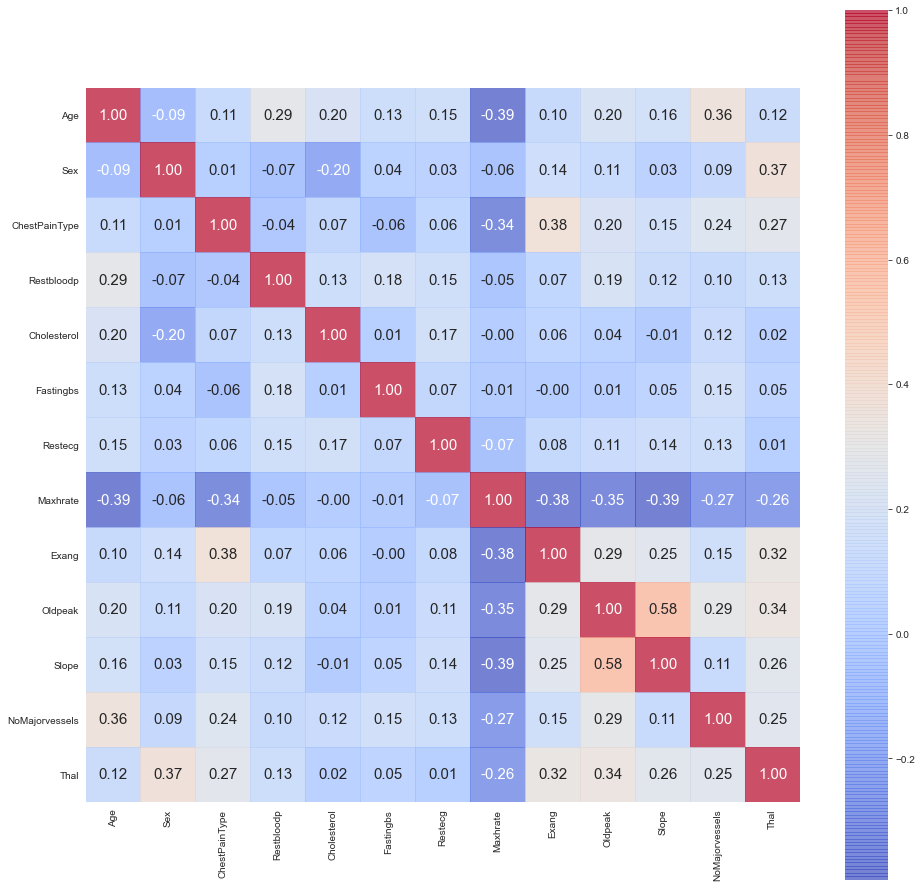

In [60]:
corr = heart[features].corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features, alpha = 0.7,   cmap= 'coolwarm')
plt.show()

In [61]:
X = heart[features] 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
y = heart['Condition'] 
# set a seed and a test size for splitting the dataset 
seed = 70
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size , random_state = seed)

In [62]:
heart.describe()

,Age,Sex,ChestPainType,Restbloodp,Cholesterol,Fastingbs,Restecg,Maxhrate,Exang,Oldpeak,Slope,NoMajorvessels,Thal,Condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Elapsed time to train XGBoost  0.724 seconds


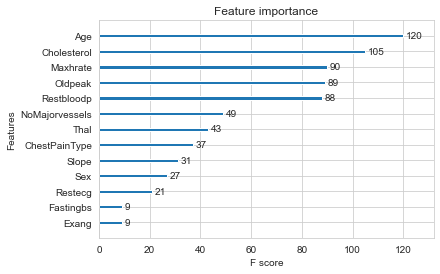

In [63]:
model_importances = XGBClassifier()
start = time()
model_importances.fit(X_train, y_train)
print('Elapsed time to train XGBoost  %.3f seconds' %(time()-start))
plot_importance(model_importances)
plt.show()

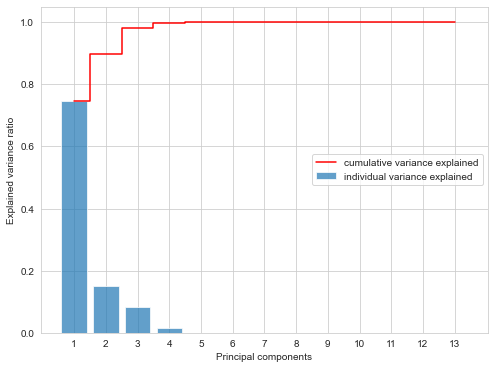

In [64]:
pca = PCA(random_state = seed)
pca.fit(X_train)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize=(8,6))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance explained', \
       alpha = 0.7)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance explained', \
        color= 'red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

In [65]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train.ravel())
scores = cross_val_score(clf, X_train, y_train.ravel(), cv=10)
scores.mean()
y_pred_clf_train = clf.predict(X_train)
accuracy_clf_train = accuracy_score(y_train, y_pred_clf_train)
print("Training set: ", accuracy_clf_train)
y_pred_clf_test = clf.predict(X_test)
accuracy_clf_test = accuracy_score(y_test, y_pred_clf_test)
print("Test set: ", accuracy_clf_test)


Training set:  1.0
Test set:  0.85


In [76]:
#confusionmatrix for random forest
confusion_matrix(y_test, y_pred_clf_test)

array([[25,  6],
       [ 3, 26]], dtype=int64)

In [77]:
#confusion matrix metrices for Random forest
matrix = classification_report(y_test, y_pred_clf_test)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.81      0.85        31
           1       0.81      0.90      0.85        29

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



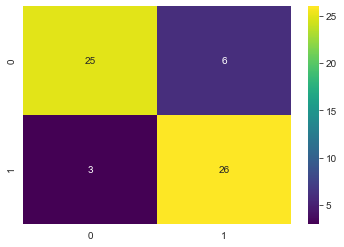

In [78]:
#Random forest
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_clf_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

In [19]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train.ravel())
y_pred_nb_train = classifier_nb.predict(X_train)
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print("Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(X_test)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Test set: ", accuracy_nb_test)

Training set:  0.8396624472573839
Test set:  0.8666666666666667


In [79]:
#confusionmatrix for Naive Bayes
confusion_matrix(y_test, y_pred_nb_test)

array([[27,  4],
       [ 4, 25]], dtype=int64)

In [80]:
#classification report metrices for Naive_bayes
matrix = classification_report(y_test, y_pred_nb_test)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        31
           1       0.86      0.86      0.86        29

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



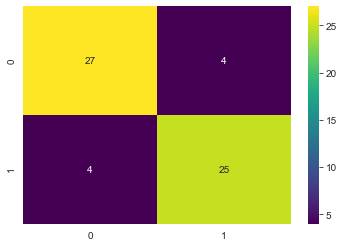

In [20]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

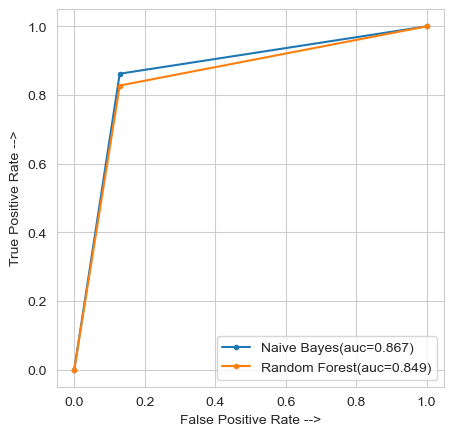

In [46]:
NaiveBayes_fpr, NaiveBayes_tpr, threshold = roc_curve(y_test, y_pred_nb_test)
auc_NaiveBayes = auc(NaiveBayes_fpr, NaiveBayes_tpr)

RandomForest_fpr, RandomForest_tpr, threshold = roc_curve(y_test, y_pred_clf_test)
auc_Rf = auc(RandomForest_fpr, RandomForest_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(NaiveBayes_fpr, NaiveBayes_tpr,marker='.',label='Naive Bayes(auc=%0.3f)'% auc_NaiveBayes)
plt.plot(RandomForest_fpr, RandomForest_tpr,marker='.',label='Random Forest(auc=%0.3f)'% auc_Rf)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()


In [45]:
from sklearn.linear_model import LogisticRegression
clfl_lg = LogisticRegression()
clfl_lg.fit(X_train, y_train.ravel())
y_pred_lg_train = clfl_lg.predict(X_train)
accuracy_lg_train = accuracy_score(y_train, y_pred_lg_train)
print("Training set: ", accuracy_lg_train)

y_pred_lg_test = clfl_lg.predict(X_test)
accuracy_lg_test = accuracy_score(y_test, y_pred_lg_test)
print("Test set: ", accuracy_lg_test)

Training set:  0.869198312236287
Test set:  0.8333333333333334


In [75]:
#logistic regression
confusion_matrix(y_test, y_pred_lg_test)

array([[24,  7],
       [ 3, 26]], dtype=int64)

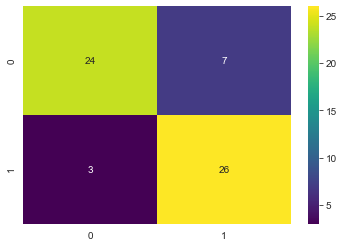

In [73]:
from sklearn.linear_model import LogisticRegression
sns.heatmap(confusion_matrix(y_test, y_pred_lg_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

In [82]:
#confusion matrix metrices for Logistic Regression
matrix = classification_report(y_test, y_pred_lg_test)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.77      0.83        31
           1       0.79      0.90      0.84        29

    accuracy                           0.83        60
   macro avg       0.84      0.84      0.83        60
weighted avg       0.84      0.83      0.83        60



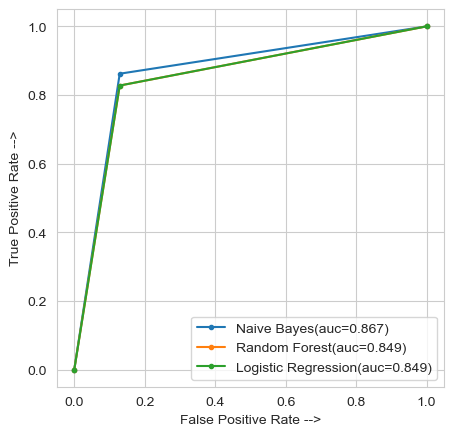

In [43]:
NaiveBayes_fpr, NaiveBayes_tpr, threshold = roc_curve(y_test, y_pred_nb_test)
auc_NaiveBayes = auc(NaiveBayes_fpr, NaiveBayes_tpr)

RandomForest_fpr, RandomForest_tpr, threshold = roc_curve(y_test, y_pred_clf_test)
auc_Rf = auc(RandomForest_fpr, RandomForest_tpr)

LogisticRegression_fpr, LogisticRegression_tpr, threshold = roc_curve(y_test, y_pred_clf_test)
auc_lg = auc(LogisticRegression_fpr, LogisticRegression_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(NaiveBayes_fpr, NaiveBayes_tpr,marker='.',label='Naive Bayes(auc=%0.3f)'% auc_NaiveBayes)
plt.plot(RandomForest_fpr, RandomForest_tpr,marker='.',label='Random Forest(auc=%0.3f)'% auc_Rf)
plt.plot(LogisticRegression_fpr, LogisticRegression_tpr,marker='.',label='Logistic Regression(auc=%0.3f)'% auc_lg)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()


Logistic Regression: 82.246377 (+/- 8.452985) performed in 0.179964 seconds
Naive Bayes: 83.949275 (+/- 5.336798) performed in 0.054003 seconds
Random Forest: 80.579710 (+/- 5.542294) performed in 1.738097 seconds


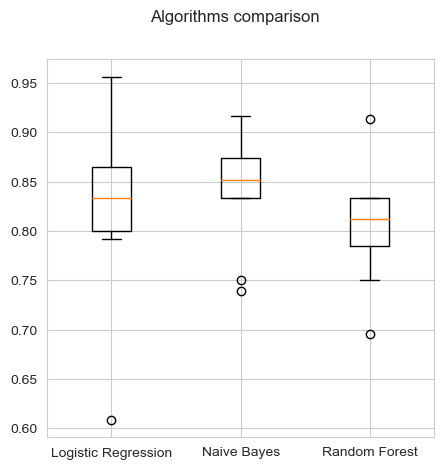

In [44]:
n_components = 4
pipelines = []
n_estimators = 200

#print(df.shape)
pipelines.append( ('Logistic Regression',
                   Pipeline([
                              ('sc', StandardScaler()),
#                               ('pca', PCA(n_components = n_components, random_state=seed ) ),
                             ('LR', LogisticRegression(random_state=seed))]) ) )


pipelines.append(('Naive Bayes',
                  Pipeline([ 
                              ('sc', StandardScaler()),
#                             ('pca', PCA(n_components = n_components, random_state=seed ) ),
                            ('NB', GaussianNB()) ])))
pipelines.append( ('Random Forest',
                   Pipeline([
                              ('sc', StandardScaler()),
#                              ('pca', PCA(n_components = n_components, random_state=seed ) ), 
                             ('RF', RandomForestClassifier(random_state=seed, n_estimators=n_estimators)) ]) ))


results, names, times  = [], [] , []
num_folds = 10
scoring = 'accuracy'

for name, model in pipelines:
    start = time()
    kfold = StratifiedKFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring,
                                n_jobs=-1) 
    t_elapsed = time() - start #how long the codecan run, say which is faster
    results.append(cv_results)
    names.append(name)
    times.append(t_elapsed)
    msg = "%s: %f (+/- %f) performed in %f seconds" % (name, 100*cv_results.mean(), 
                                                       100*cv_results.std(), t_elapsed)
    print(msg)


fig = plt.figure(figsize=(5,5), dpi=100)    
fig.suptitle("Algorithms comparison")
ax = fig.add_subplot(1,1,1)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()